# Einleitung

**Im Folgenden betrachten wir den Datensatz (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data), der Kundendaten eines Telekommunikationsunternehmens enthält.
Ziel ist es herauszufinden, wann ein Kunde seinen Vertrag kündigt.**

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Explorative Datenanalyse

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Jede Zeile steht für einen Kunden, jede Spalte enthält die Attribute des Kunden.
- Der Datensatz enthält 7043 Zeilen (Kunden) und 21 Spalten (Attribute).
- Die Spalte "Churn" ist unser Ziel.

**Der Datensatz enthält folgende Informationen:**

- Kunden, die innerhalb des letzten Monats gekündigt haben, werden in der Spalte 'Churn' erfasst.
- Dienste, für die sich jeder Kunde angemeldet hat - Telefon, mehrere Leitungen, Internet, Online-Sicherheit, Online-Backup, Geräteschutz, technischer Support sowie TV- und Film-Streaming
- Informationen zum Kundenkonto - wie lange der Kunde bereits Kunde ist, Vertrag, Zahlungsmethode, papierlose Abrechnung, monatliche Gebühren und Gesamtgebühren
- Demografische Informationen über Kunden - Geschlecht, Altersgruppe und ob sie Partner und Angehörige haben

### Data Cleaning

**Zunächst entfernen wir die Variable 'customerID' da sie keinen Nutzen für uns hat.**

In [4]:
df.drop(['customerID'], axis = 1, inplace= True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Es fällt auf das die Variable 'totalCharges' als object gespeichert ist, obwohl sie eigentlich numerisch ist.**

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Es fehlen 11 Werte bei TotalCharges.  Wir haben uns dafür entschieden, diese Werte zu imputieren. Bevor wir dies tun, betrachten wir jedoch mögliche Ausreißer.**

In [8]:
z_tenure = np.abs(stats.zscore(df['tenure']))
outliers_tenure = df[z_tenure > 3]

z_MonthlyCharges = np.abs(stats.zscore(df['MonthlyCharges']))
outliers_MonthlyCharges = df[z_MonthlyCharges > 3]

z_TotalCharges = np.abs(stats.zscore(df['TotalCharges']))
outliers_TotalCharges = df[z_TotalCharges > 3]

print(outliers_tenure,outliers_MonthlyCharges,outliers_TotalCharges)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: [] Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: [] Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


**Es gibt gemäß dem Z-Score keine Ausreißer. Die 11 fehlenden Werte werden durch die Mittelwerte der Variable 'TotalCharges' ersetzt.**

In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Als nächstes ändern wir alle Kategoriale Variable zu dummy Variabeln**

In [10]:
df['Churn'] = df['Churn'].map({"No": 0,"Yes": 1})
dummie_table = pd.get_dummies(df)

### Daten Visualisierung

In [11]:
df[['tenure', 'MonthlyCharges', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,64.761692
std,24.559481,30.090047,30.090047
min,0.000000,18.250000,18.250000
25%,9.000000,35.500000,35.500000
50%,29.000000,70.350000,70.350000
75%,55.000000,89.850000,89.850000
max,72.000000,118.750000,118.750000


<Axes: xlabel='TotalCharges', ylabel='Count'>

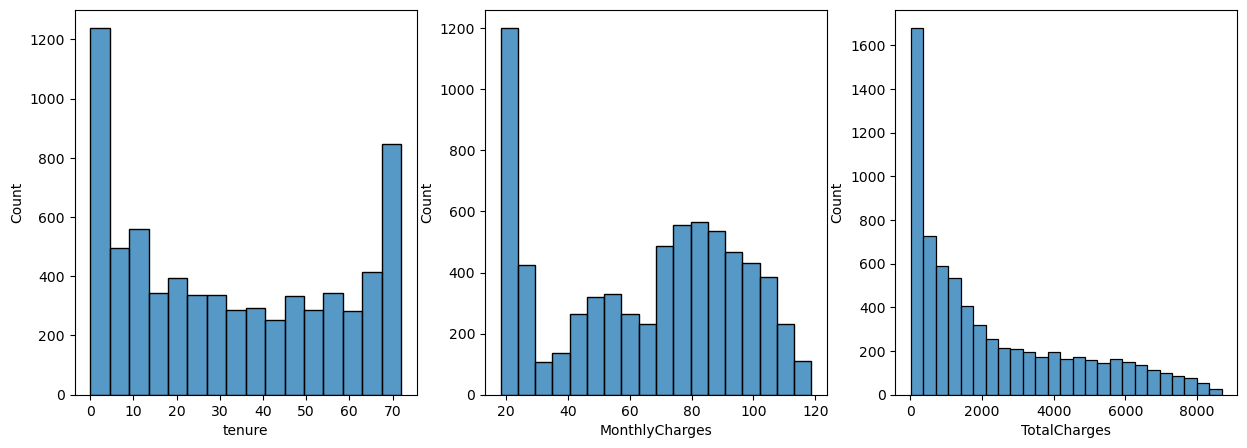

In [12]:
fig,axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(x = df['tenure'], data = df, ax = axes[0])
sns.histplot(x = df['MonthlyCharges'], data = df, ax = axes[1])
sns.histplot(x = df['TotalCharges'], data = df, ax = axes[2])

- Die meisten Laufzeiten sind entweder kurz (0-10 Monate) oder lang (65+ Monate).
- Die monatlichen Gebühren sind bimodal um 20 bzw. 90 verteilt.
- Währenddessen nehmen die Gesamtgebühren ab.

**Wir untersuchen die Beziehung zwischen der Verteilung der Variablen Laufzeit, monatlichen Gebühren und Gesamtgebühren und der Abwanderung.**

<Axes: xlabel='TotalCharges', ylabel='Density'>

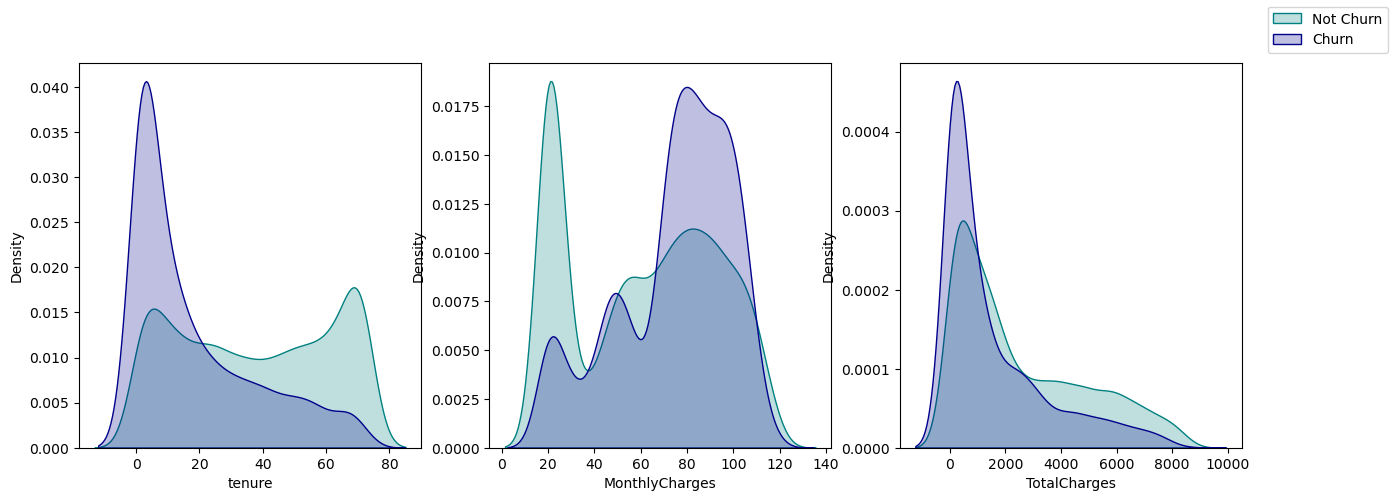

In [44]:
fig,axes = plt.subplots(1,3, figsize=(15,5)) 

sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],color="teal", fill = True, ax = axes[0])
sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ], color="darkblue", fill= True, ax = axes[0])
fig.legend(["Not Churn","Churn"],loc='upper right')
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="teal", fill = True, ax = axes[1])
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], color="darkblue", fill= True, ax = axes[1])

sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],color="teal", fill = True, ax = axes[2])
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], color="darkblue", fill= True, ax = axes[2])

**Personen mit:** 
- kurzer Laufzeit 
- hohen Monatlichen Gebühren \
**wanderen wahrscheinlicher ab**

**Wir betrachten die Korrelationen zwischen den Variabeln.**

<Axes: >

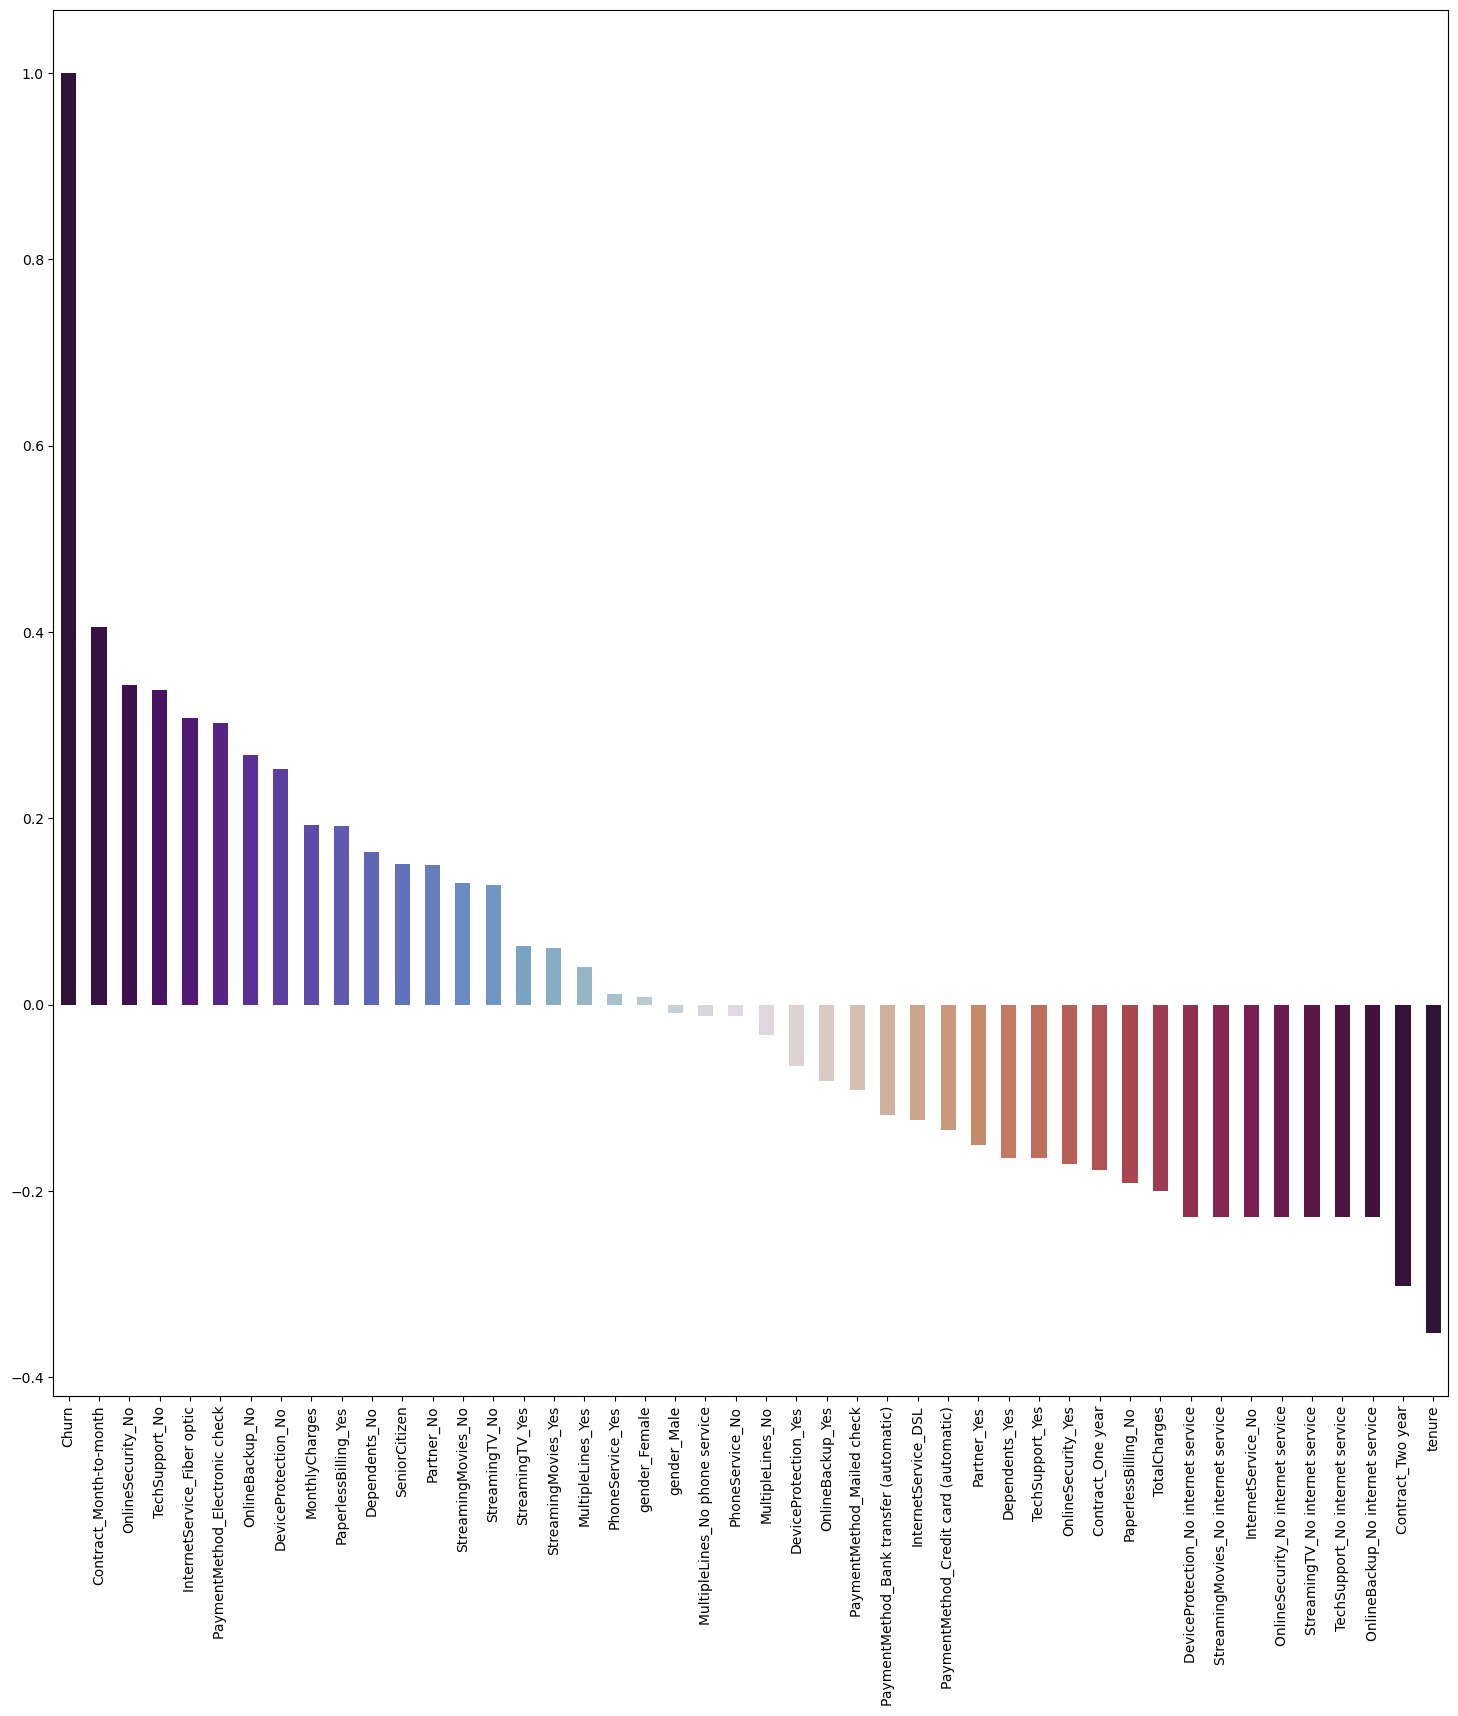

In [14]:
corr = dummie_table.corrwith(dummie_table['Churn'])
plt.figure(figsize=(18,18))
color = plt.cm.twilight_shifted(np.linspace(0, 1, 46))
corr.sort_values(ascending=False).plot(kind = 'bar',color = color)


In [15]:
df['Churn'] = df['Churn'].map({0:"No",1:"Yes"})
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:"No",1:"Yes"})

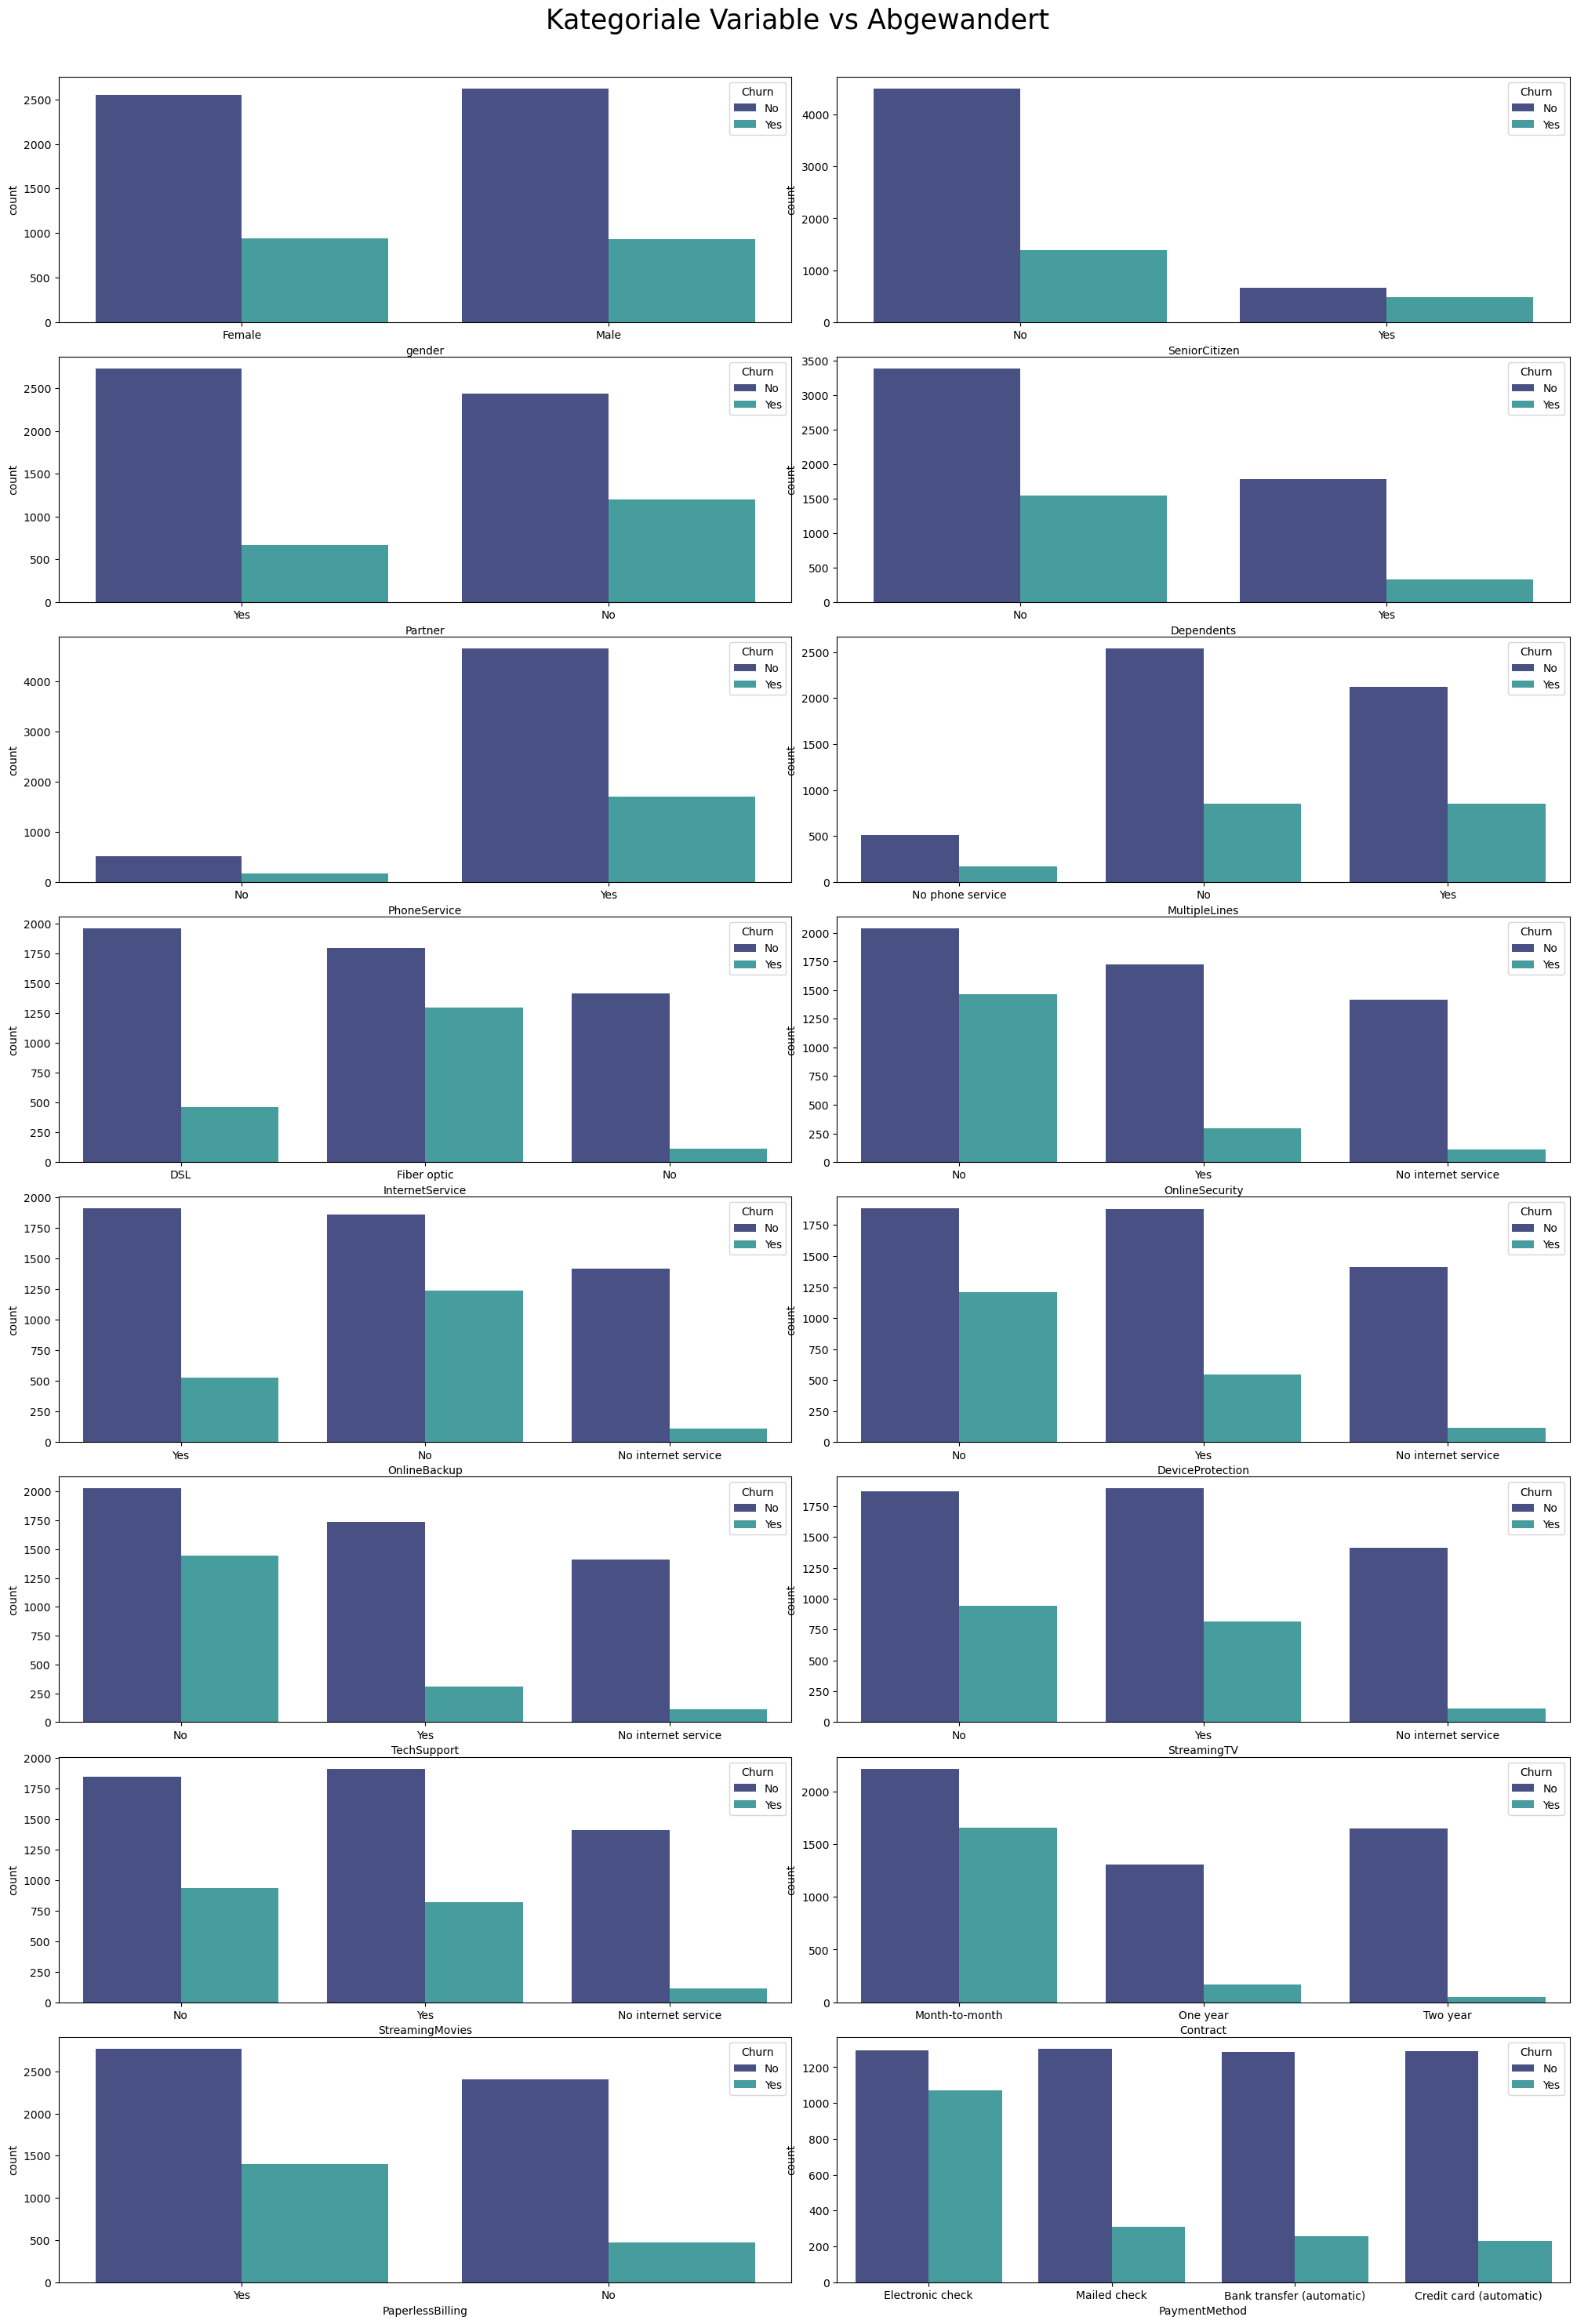

In [53]:
fig,axes = plt.subplots(8,2, figsize=(20,30))
fig.suptitle('Kategoriale Variable vs Abgewandert  \n \n', fontsize=25)
fig.tight_layout()
for var, axes in zip(df.columns[~df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])], axes.ravel()):
    sns.countplot(x = var,hue = 'Churn', data = df, ax=axes, palette='mako')


- Es scheint keinen Unterschied zwischen Männern und Frauen zu geben.
- Verhältnismäßig wandern mehr Senioren ab als Nicht-Senioren. Die untere Grafik wird uns jedoch mehr Aufschluss geben.
- Kunden ohne Partner oder Angehörige wandern häufiger ab als diejenigen mit.
- Es wandern deutlich mehr Kunden ab, die einen monatlichen Vertrag haben.
- Gleiches gilt für Kunden, die elektronisch bezahlen.

**Wir betrachten dieselben Statistiken erneut, jedoch nur für die Kunden, die abgewandert sind.**


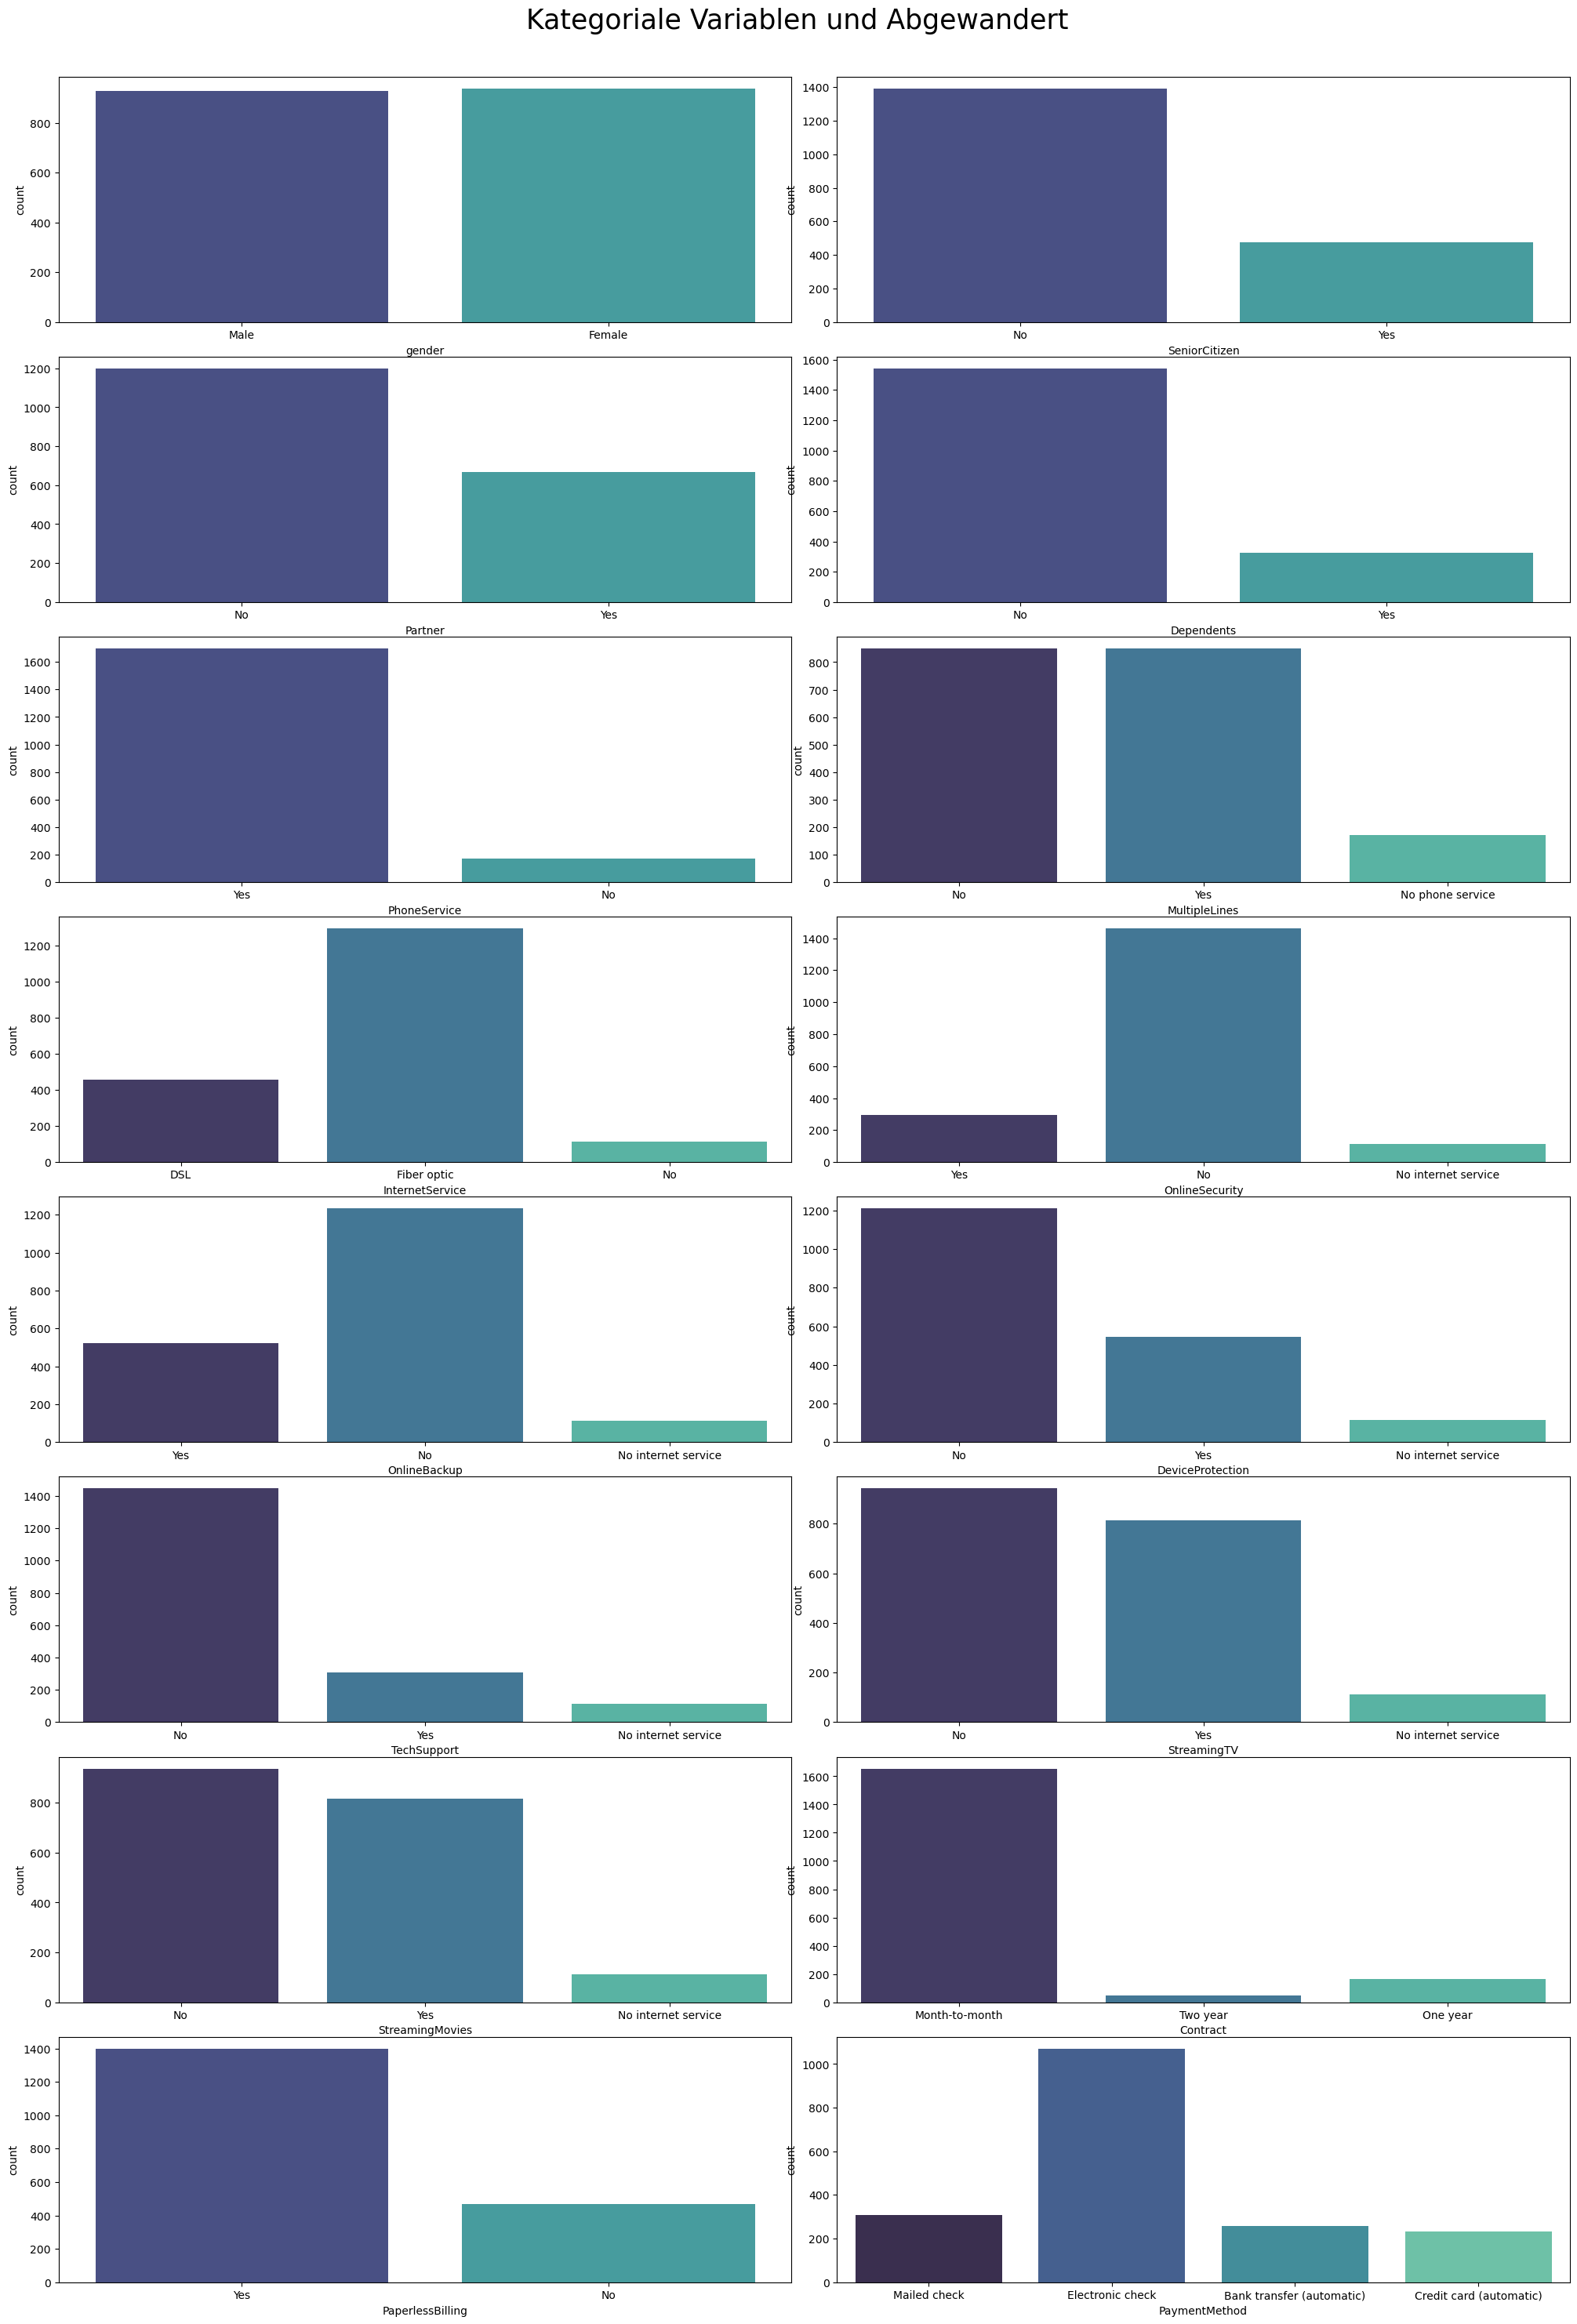

In [50]:
df_churn_only = df[df['Churn'] == 'Yes']
fig,axes = plt.subplots(8,2, figsize=(20,30))
fig.suptitle('Kategoriale Variablen und Abgewandert  \n \n', fontsize=25)
fig.tight_layout()
for var, axes in zip(df.columns[~df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])], axes.ravel()):
    sns.countplot(x = var, data = df_churn_only, ax=axes, palette='mako')

- Hier sehen wir, dass vor allem Nicht-Senioren abwandern, ebenso wie Menschen ohne Partner oder Angehörige.
- Kunden mit Monatsverträgen wandern klar vorrangig ab.
- Eine papierlose Rechnung hält Kunden nicht davon ab, abzuwandern.
- Unter den Zahlungsmethoden dominiert die Abwanderungsquote beim elektronischen Check.

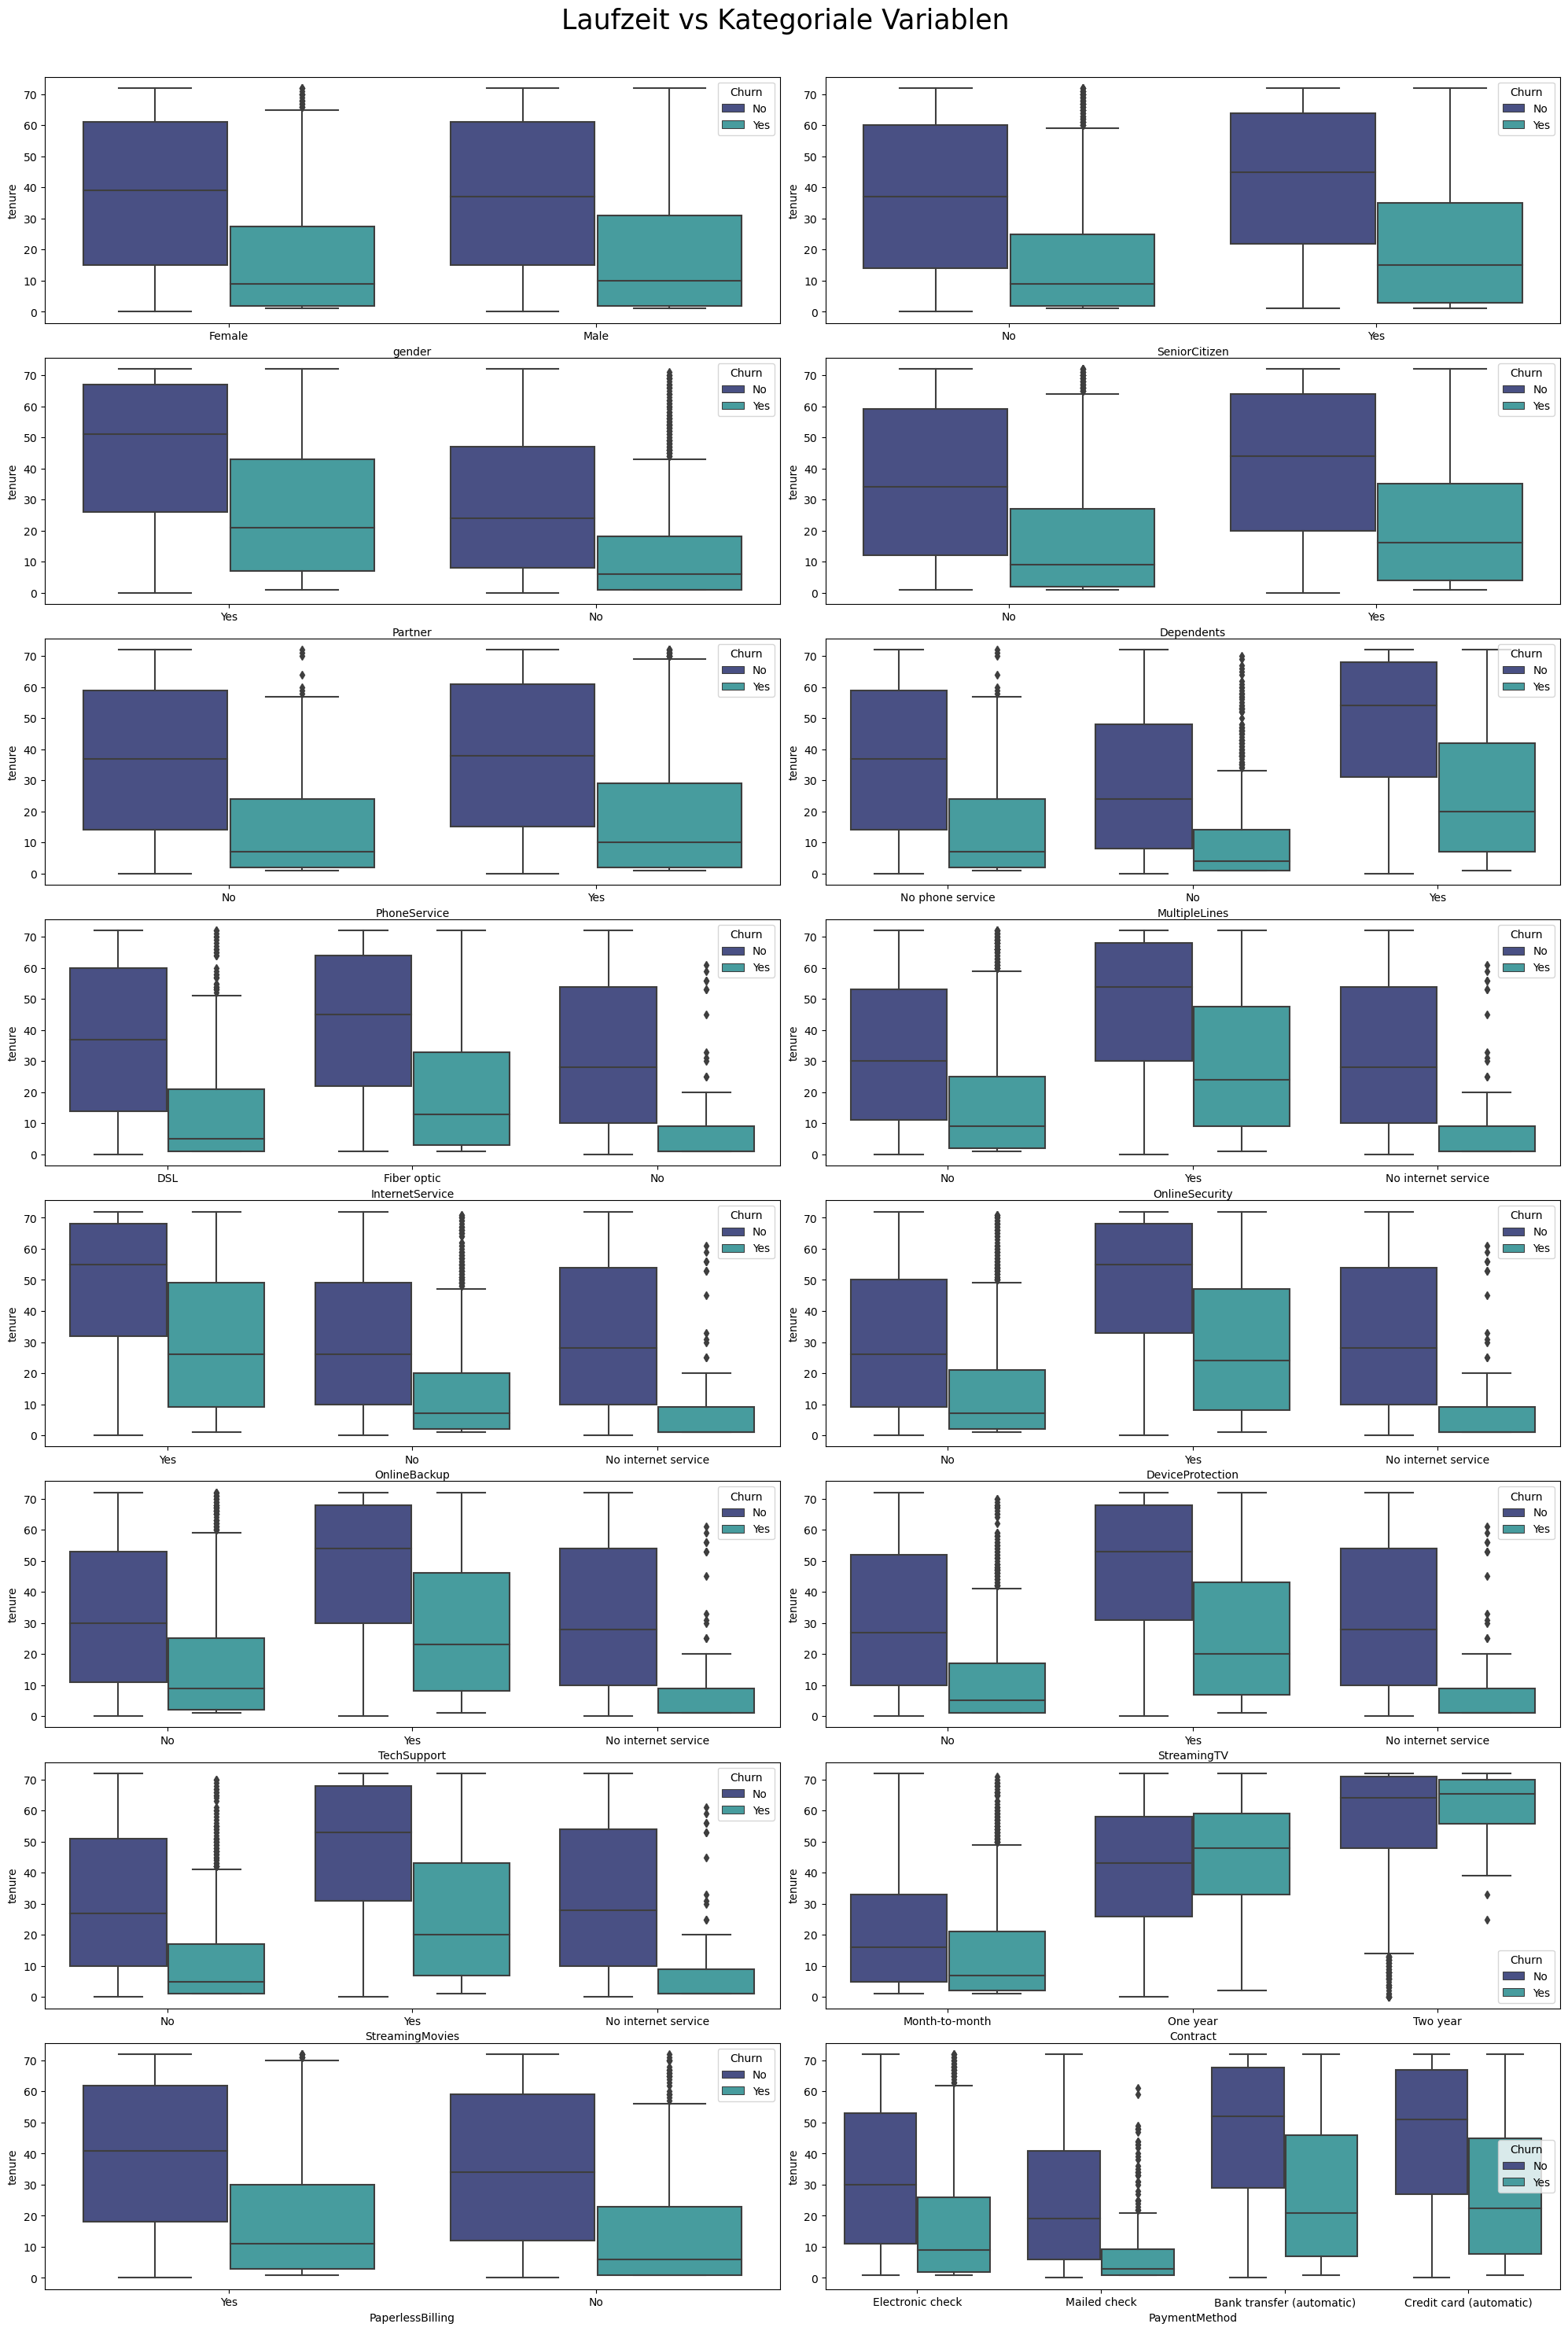

In [46]:
fig,axes = plt.subplots(8,2, figsize=(20,30))
fig.suptitle('Laufzeit vs Kategoriale Variablen  \n \n', fontsize=25)
fig.tight_layout()
for var, axes in zip(df.columns[~df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])], axes.ravel()):
    sns.boxplot(x = var,y = 'tenure' ,hue = 'Churn', data = df, ax=axes, palette='mako')

- Es scheint keine Unterschiede bezüglich des Geschlechts zu geben.
- Ob ein Kunde mit oder ohne Partner, Angehörige oder Senioren abwandert, wird meist in den ersten 0 bis 30 Monaten entschieden.
- Bei monatlichen Verträgen kündigen die meisten direkt nach 10 Monaten.

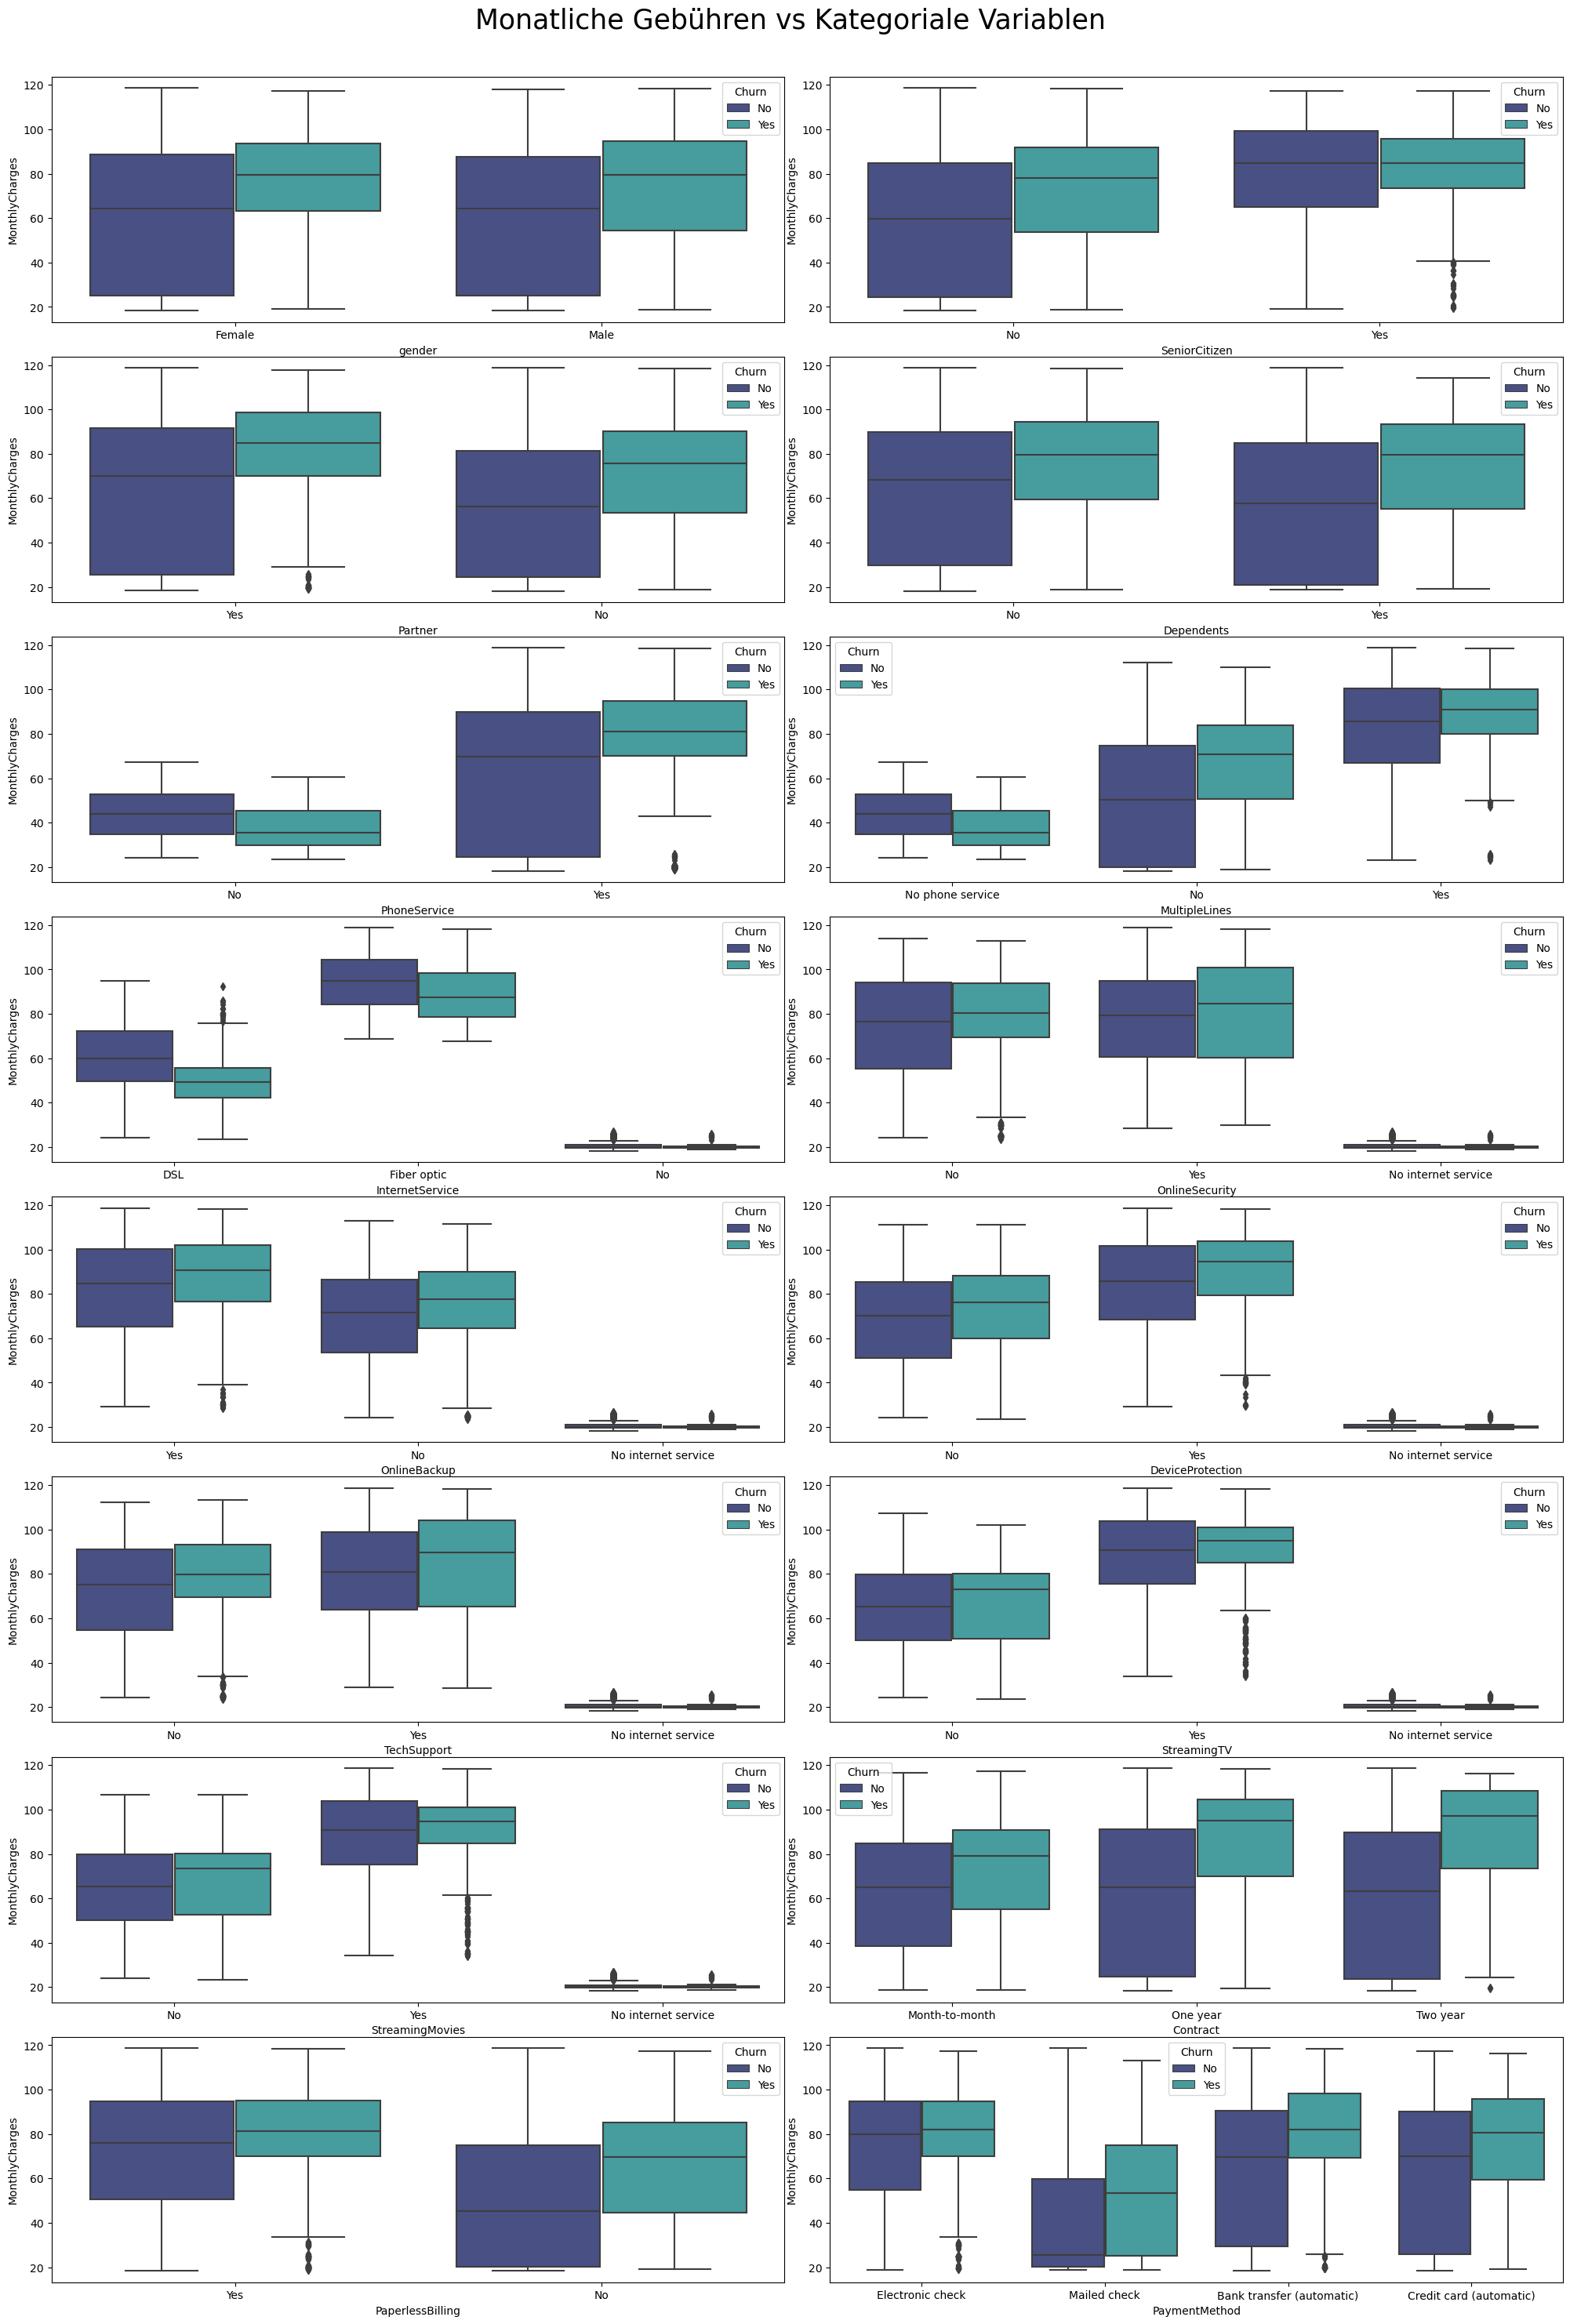

In [45]:
fig,axes = plt.subplots(8,2, figsize=(20,30)) 
fig.suptitle('Monatliche Gebühren vs Kategoriale Variablen  \n \n', fontsize=25)
fig.tight_layout()
for var, axes in zip(df.columns[~df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])], axes.ravel()):
    sns.boxplot(x = var,y = 'MonthlyCharges' ,hue = 'Churn', data = df, ax=axes, palette='mako')

- Kunden kündigen tendenziell eher bei hohen monatlichen Gebühren.
- Kunden mit Partner und Senioren haben dabei eine höhere Toleranz als solche ohne.
- Kunden mit monatlichem Vertrag kündigen auch bei geringeren monatlichen Kosten im Vergleich zu Ein- oder Zweijahresverträgen.


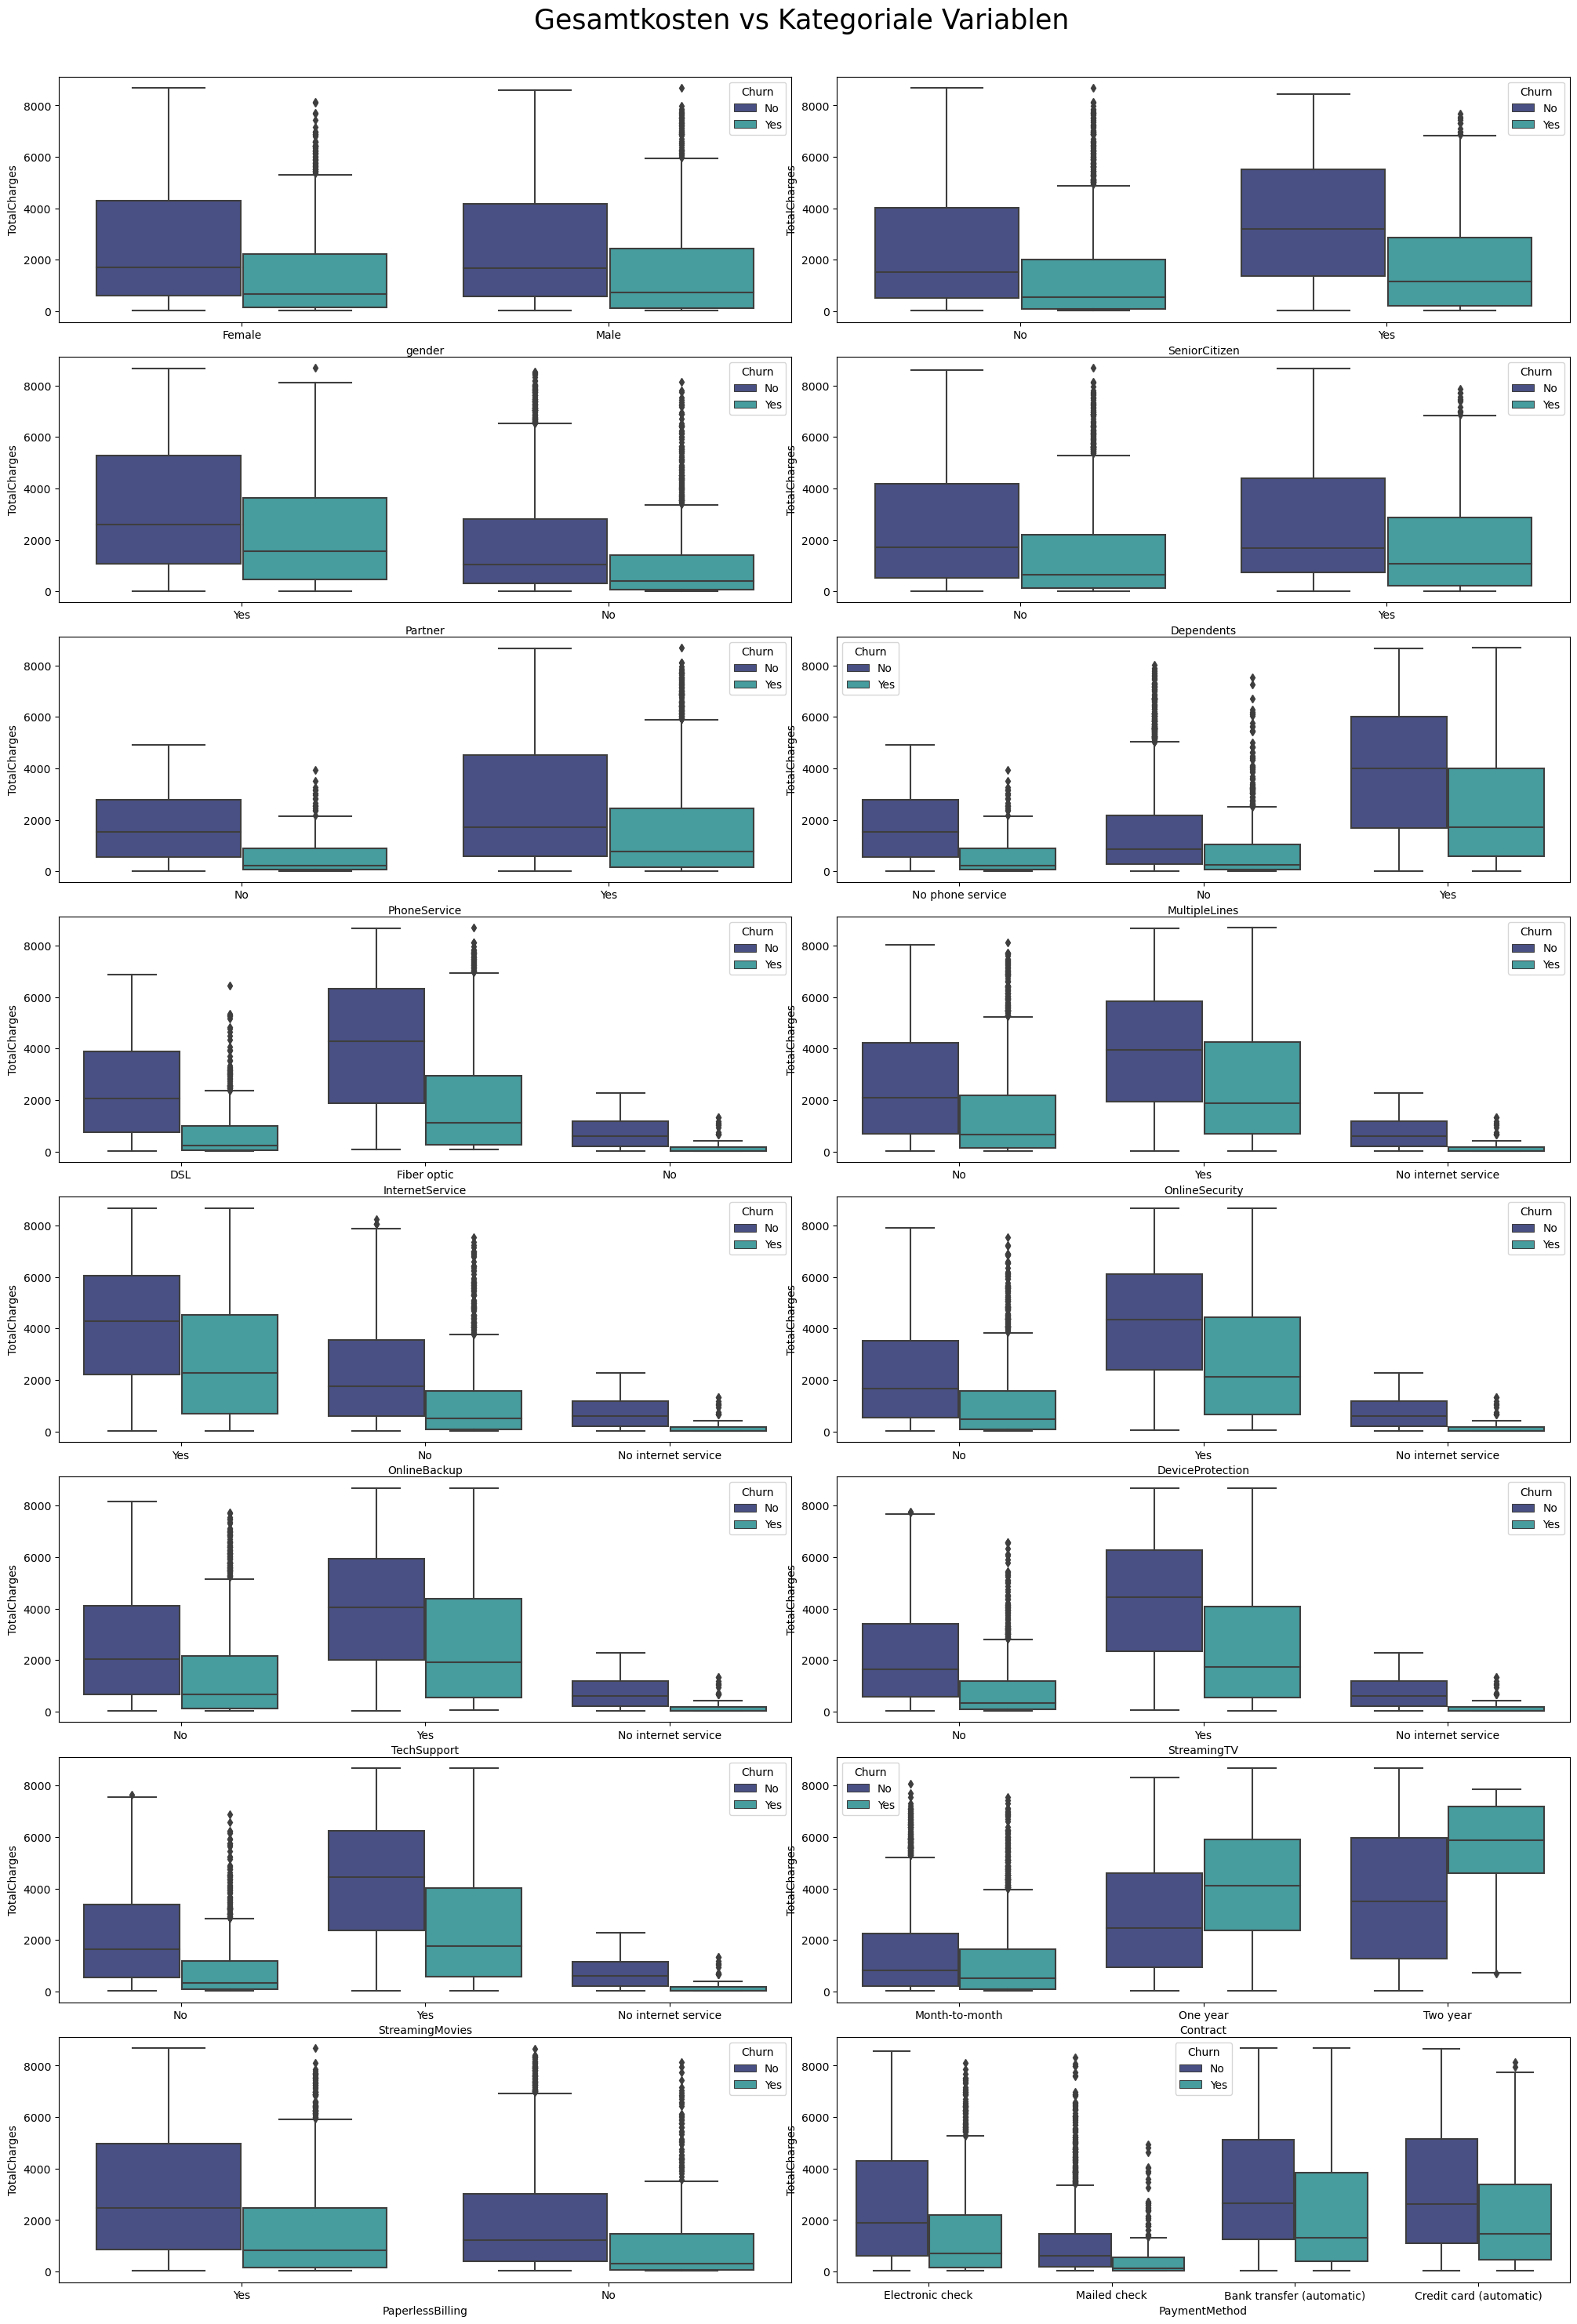

In [51]:
fig,axes = plt.subplots(8,2, figsize=(20,30)) 
fig.suptitle('Gesamtkosten vs Kategoriale Variablen \n \n', fontsize=25)
fig.tight_layout()
for var, axes in zip(df.columns[~df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])], axes.ravel()):
    sns.boxplot(x = var,y = 'TotalCharges' ,hue = 'Churn', data = df, ax=axes, palette='mako')

- Kunden mit Zweijahresverträgen sind besonders bei hohen Kosten von 6000 abgewandert.
- Das gleiche gilt für Kunden mit Einjahresverträgen bei Kosten von 4000. 
- Im Gegensatz dazu wandern Kunden mit Monatsverträgen auch bei geringen Gesamtkosten ab.

### Zusammenfassung

**Besonders hoch ist das Risiko einer Kündigung für Menschen, die keinen Partner, keine Angehörigen,
Senioren oder einen monatlichen Vertrag haben.**

**Des Weiteren sollte der Elektronische Check abgeschaft werden.**

# Machine Learning

 **Im Folgenden werden einige Vorhersagemodelle vorgestellt, mit denen wir herausfinden wollen, ob ein Kunde kündigen wird oder nicht.**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = dummie_table.drop('Churn', axis=1).values
y = dummie_table['Churn'].values


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [24]:
def evaluation(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))

### Logistic Regression

In [25]:
model_LR = LogisticRegression()
evaluation(model_LR,X_train, X_test,y_train, y_test)

0.8105039034776437


### KNN

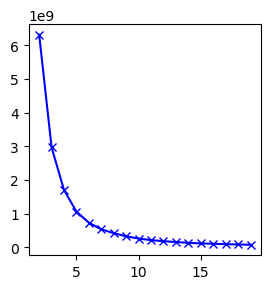

In [26]:
from sklearn.cluster import KMeans
abstand = []
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X_train)
    abstand.append(k_means.inertia_)

fig = plt.figure(figsize=(3,3))
plt.plot(range(2,20), abstand, 'bx-')

In [27]:
model_KNN = KNeighborsClassifier(n_neighbors= 6)
evaluation(model_KNN,X_train, X_test,y_train, y_test)

0.7828246983676366


### Random Forrest

In [28]:
model_RF = RandomForestClassifier()
evaluation(model_RF,X_train, X_test,y_train, y_test)

0.7977288857345636


### SVM

In [29]:
model_svc = SVC()
evaluation(model_svc,X_train, X_test,y_train, y_test)

0.759403832505323


### Decision Tree


In [30]:
model_DT = DecisionTreeClassifier()
evaluation(model_DT,X_train, X_test,y_train, y_test)

0.7274662881476224


### ADA Boost

In [34]:
model_ada = AdaBoostClassifier()
evaluation(model_DT,X_train, X_test,y_train, y_test)

0.7324343506032647


### XG Boost

In [37]:
model_xg = XGBClassifier()
evaluation(model_xg,X_train, X_test,y_train, y_test)

0.7885024840312278


**Zusammenfassend**

**Wir sehen, dass die logistische Regression die beste Vorhersagerate mit 81% aufweist.**